In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
datatemp=pd.read_csv("/content/train.csv")
test_data=pd.read_csv("/content/test.csv")
np.array(datatemp)
data=pd.DataFrame(datatemp)
data.head(1)



,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass


<ipython-input-17-5cdfb53b1026>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='state', y='ID', data=temp1data,palette='tab10')


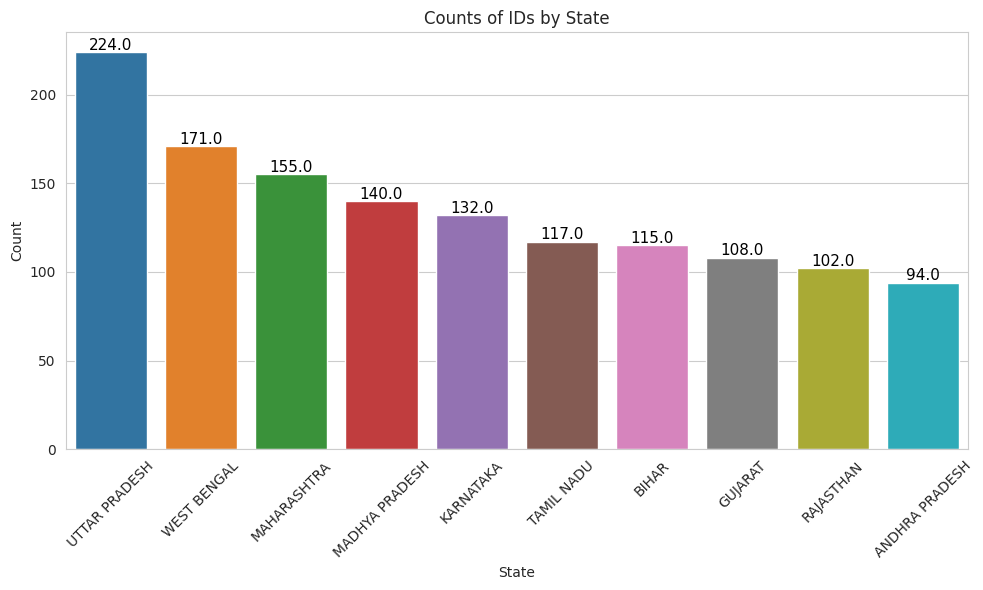

In [17]:
# Let's do some valuable data visualisation
# 1. 10 states with the highest number of constituencies



tempdata = data.groupby('state').count().sort_values('ID', ascending=False)
temp1data = tempdata.head(10)

plt.figure(figsize=(10, 6))

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

ax = sns.barplot(x='state', y='ID', data=temp1data,palette='tab10')

plt.xlabel('State')
plt.ylabel('Count')
plt.title('Counts of IDs by State')

plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()






In [18]:
a=data.groupby('Education').count()
print(a)

                        ID  Candidate  Constituency ∇  Party  Criminal Case  \
Education                                                                     
10th Pass              227        227             227    227            227   
12th Pass              349        349             349    349            349   
5th Pass                 9          9               9      9              9   
8th Pass                78         78              78     78             78   
Doctorate               52         52              52     52             52   
Graduate               531        531             531    531            531   
Graduate Professional  339        339             339    339            339   
Literate                14         14              14     14             14   
Others                  28         28              28     28             28   
Post Graduate          432        432             432    432            432   

                       Total Assets  Liabilities  s

<ipython-input-19-c44dbc8ec051>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Party', y='percentage_assets', data=grouped1_data,palette='rainbow')


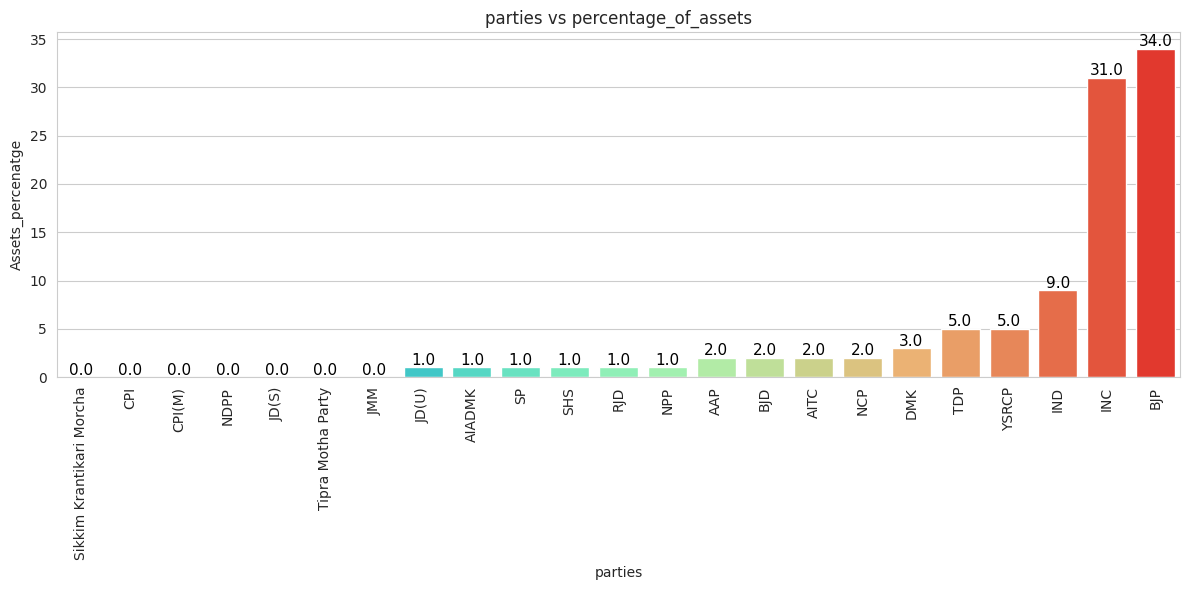

In [19]:
# 2. Parties vs percentage of total assets their candidates hold


def convert_to_integer(amount):
    if 'Crore+' in amount:
        numeric_part = float(amount.split(' ')[0])
        return int(numeric_part * 10000000)
    elif 'Lac+' in amount:
        numeric_part = float(amount.split(' ')[0])
        return int(numeric_part * 100000)
    elif 'Thou+' in amount:
        numeric_part = float(amount.split(' ')[0])
        return int(numeric_part * 1000)
    elif 'Hund+' in amount:
        numeric_part = float(amount.split(' ')[0])
        return int(numeric_part * 100)
    else:
      return int(amount)

data['Assets']=data['Total Assets'].apply(convert_to_integer)
test_data['Assets']=test_data['Total Assets'].apply(convert_to_integer)

data['liabilities']=data['Liabilities'].apply(convert_to_integer)
test_data['liabilities']=test_data['Liabilities'].apply(convert_to_integer)



grouped1_data = data.groupby('Party')['Assets'].sum().reset_index()

total_assets = grouped1_data['Assets'].sum()

grouped1_data['percentage_assets'] = ((grouped1_data['Assets'] / total_assets) * 100).round(0)
grouped1_data.sort_values('percentage_assets',inplace=True)




plt.figure(figsize=(12, 6))

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

ax = sns.barplot(x='Party', y='percentage_assets', data=grouped1_data,palette='rainbow')

plt.xlabel('parties')
plt.ylabel('Assets_percenatge')
plt.title('parties vs percentage_of_assets')

plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()











<ipython-input-20-515b00c401a8>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1=sns.barplot(data=grouped_data, x='Party', y='percentage',palette='viridis')


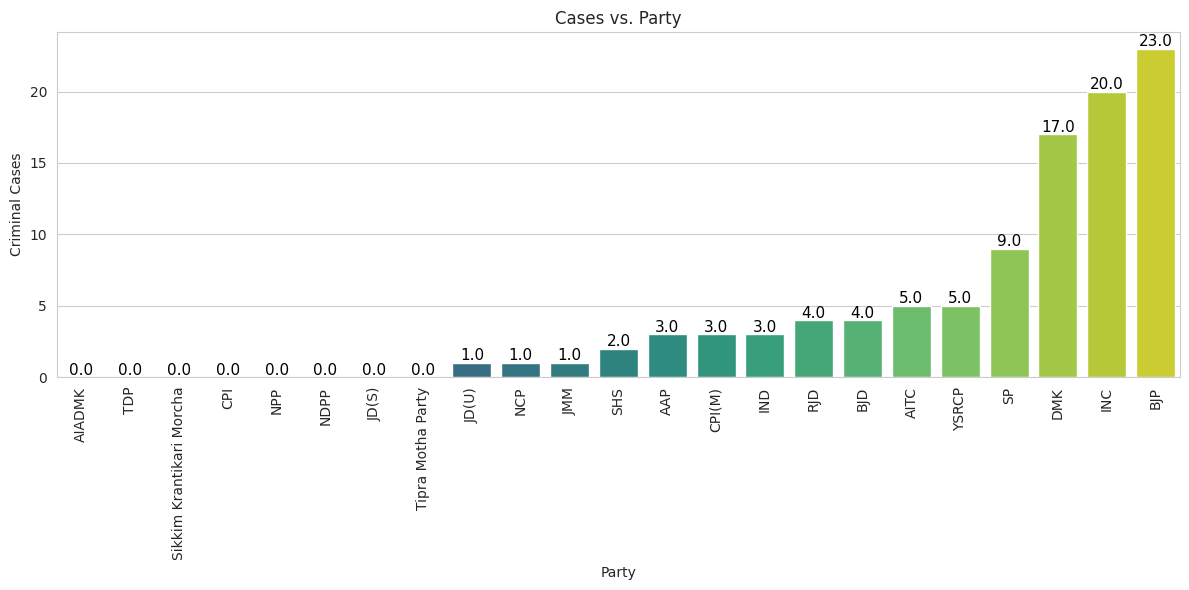

In [20]:
#  3. percentage of Criminal Cases Party wise(percentages approximate to nearest integers)




grouped_data = data.groupby('Party')['Criminal Case'].sum().reset_index()

total_sum = grouped_data['Criminal Case'].sum()

grouped_data['percentage'] = ((grouped_data['Criminal Case'] / total_sum) * 100).round(0)
grouped_data.sort_values('percentage',inplace=True)




sns.set_style('whitegrid')


plt.figure(figsize=(12, 6))
ax1=sns.barplot(data=grouped_data, x='Party', y='percentage',palette='viridis')

for p in ax1.patches:
    ax1.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')


plt.xlabel('Party')
plt.ylabel('Criminal Cases')
plt.title('Cases vs. Party')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


<ipython-input-21-4278fc0ab3ee>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2=sns.barplot(data=t2data, x='Party', y='ID',palette='coolwarm')


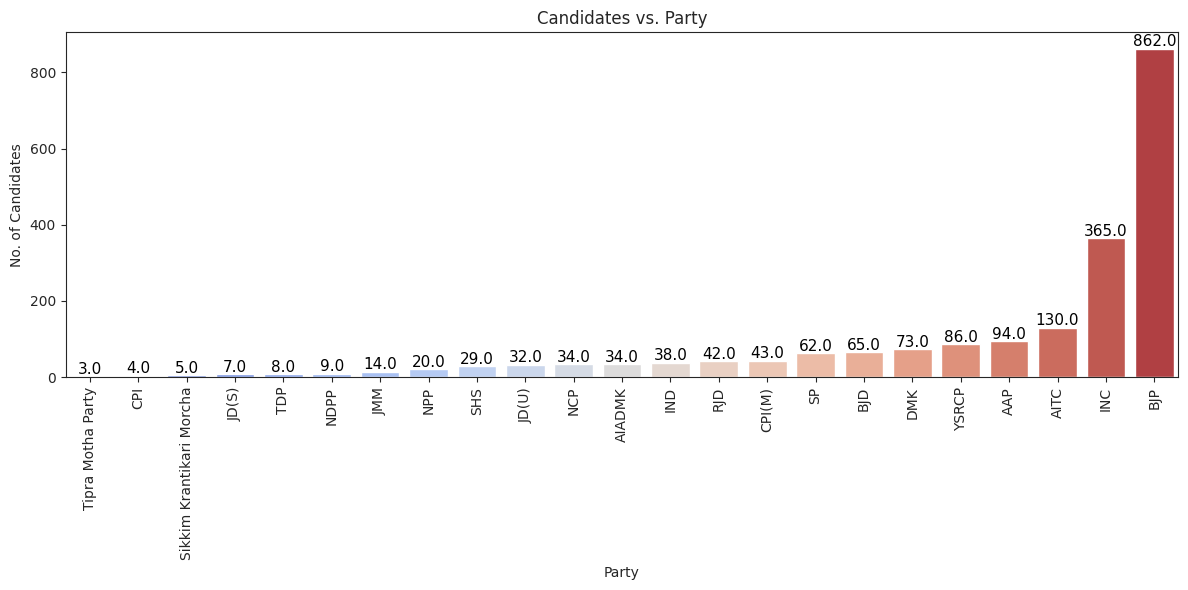

In [21]:
#  4. No. of Ids vs Party


t2data=data.groupby('Party').count().sort_values('ID')
# t2data.head()

sns.set_style('ticks')


plt.figure(figsize=(12, 6))
ax2=sns.barplot(data=t2data, x='Party', y='ID',palette='coolwarm')

for p in ax2.patches:
    ax2.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')


plt.xlabel('Party')
plt.ylabel('No. of Candidates')
plt.title('Candidates vs. Party')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()




In [22]:
# to train a model we do not need non numerical values so we can drop those columns which contain non numerical values for eg. candidate's name, Constituency, Party, State.


# dropped these two because we have the numerical values of these two
data.drop('Total Assets',axis=1,inplace=True)
data.drop('Liabilities',axis=1,inplace=True)
data.drop('Party',axis=1,inplace=True)
# data.drop('state',axis=1,inplace=True)
data.drop('Candidate',axis=1,inplace=True)
data.drop('Constituency ∇',axis=1,inplace=True)
data.drop('ID',axis=1,inplace=True)



test_data_temp=test_data.copy()
test_data.drop('ID',axis=1,inplace=True)
# test_data_temp.head(1)

test_data.drop('Total Assets',axis=1,inplace=True)
test_data.drop('Liabilities',axis=1,inplace=True)
test_data.drop('Party',axis=1,inplace=True)
# test_data.drop('state',axis=1,inplace=True)
test_data.drop('Candidate',axis=1,inplace=True)
test_data.drop('Constituency ∇',axis=1,inplace=True)



In [23]:
data['Education'].unique()
# There are 10 different classes and this is a text data so we need to convert it to a numerical representaion so that we can apply ML algorithms to it
# For this I have one hot encoding

from sklearn.preprocessing import OneHotEncoder


one_hot_encoder=OneHotEncoder()

data=pd.get_dummies(data,columns=['state'])
test_data=pd.get_dummies(test_data,columns=['state'])
data=pd.get_dummies(data,columns=['Education'])

data.head(1)
# test_data.head(1)





,Criminal Case,Assets,liabilities,state_ANDHRA PRADESH,state_ARUNACHAL PRADESH,state_ASSAM,state_BIHAR,state_CHHATTISGARH,state_DELHI,state_GOA,...,Education_10th Pass,Education_12th Pass,Education_5th Pass,Education_8th Pass,Education_Doctorate,Education_Graduate,Education_Graduate Professional,Education_Literate,Education_Others,Education_Post Graduate
0,4,2110000000,20000000,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [24]:

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [26]:
#  Random forest



X = data.drop(['Education_10th Pass','Education_5th Pass','Education_8th Pass','Education_Doctorate','Education_Literate','Education_Graduate','Education_Post Graduate','Education_Graduate Professional','Education_Others','Education_12th Pass'],axis=1)


Y =data[['Education_10th Pass','Education_5th Pass','Education_8th Pass','Education_Doctorate','Education_Literate','Education_Graduate','Education_Post Graduate','Education_Graduate Professional','Education_Others','Education_12th Pass']]

# print(X)
# Convert one-hot encoded target matrix Y to categorical labels
y = np.argmax(Y.values, axis=1)

# budhbrubur3


scaler = MinMaxScaler()


X_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.transform(X_test[['Assets','liabilities','Criminal Case']])
X_testfile_scaled=scaler.fit_transform(test_data)



# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    # 'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Initialize GridSearchCV with the Random Forest classifier and parameter grid
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_testfile_scaled)



d={
    'ID':test_data_temp['ID'],
    'Education':y_pred
}
subm = pd.DataFrame(d)

def update_education(education):
    if education == 0:
        return '10th Pass'
    elif education == 1:
        return '5th Pass'
    elif education ==2:
        return '8th Pass'
    elif education == 3:
        return 'Doctorate'
    elif education == 4:
        return 'Literate'
    elif education == 5:
        return 'Graduate'
    elif education == 6:
        return 'Post Graduate'
    elif education == 7:
        return 'Graduate Professional'
    elif education == 8:
        return 'Others'
    elif education == 9:
        return '12th Pass'



subm['Education'] = subm['Education'].apply(update_education)

submission_df = pd.DataFrame({'ID': test_data_temp['ID'], 'Education':y_pred})
subm.to_csv("submission.csv", index=False)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [28]:
y_pred[0:1000]

array([9, 5, 5, 6, 5, 5, 5, 6, 5, 6, 7, 7, 6, 6, 5, 7, 5, 7, 6, 5, 5, 5,
       6, 5, 9, 5, 5, 5, 5, 7, 5, 9, 7, 6, 6, 5, 6, 5, 5, 5, 6, 6, 7, 6,
       5, 5, 9, 5, 6, 5, 7, 7, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 9, 5,
       7, 5, 5, 5, 5, 5, 6, 7, 5, 9, 6, 5, 5, 5, 7, 5, 5, 7, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 7, 7, 9, 5, 0,
       5, 6, 5, 5, 5, 6, 5, 7, 7, 5, 5, 5, 5, 5, 5, 9, 6, 5, 5, 5, 7, 5,
       5, 5, 5, 5, 5, 7, 5, 6, 6, 6, 5, 6, 6, 5, 7, 6, 5, 5, 7, 5, 5, 5,
       5, 5, 5, 5, 5, 9, 7, 5, 9, 5, 7, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 7, 5, 5, 9,
       5, 5, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 5, 9, 6, 5, 7, 5, 6, 5, 5, 9,
       5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 9, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 6, 5, 7, 6, 6, 5, 5, 5, 5, 5, 9, 6, 6, 5, 5, 5, 6,
       6, 5, 9, 9, 5, 5, 5, 5, 5, 5, 5, 6, 9, 5, 6, 5, 5, 0, 5, 5, 5, 9,
       5, 5, 5, 7, 5, 6, 9, 5, 5, 6, 5, 7, 5, 6, 5,